In [144]:
import numpy as np
import pandas as pd
import math
import cmath
from scipy.optimize import root
from scipy.integrate import odeint
from __future__ import division
from scipy import *
from pylab import *
import matplotlib.pyplot as plt
%matplotlib inline

In [145]:
xo = 0.5
xk = 0.3
gamma = 0.8
A = 2
yr = 0.1 #kg kgCO2 −1

tao = np.linspace(0,5)
print(tao)
print(np.shape(tao), type(tao))

[0.         0.10204082 0.20408163 0.30612245 0.40816327 0.51020408
 0.6122449  0.71428571 0.81632653 0.91836735 1.02040816 1.12244898
 1.2244898  1.32653061 1.42857143 1.53061224 1.63265306 1.73469388
 1.83673469 1.93877551 2.04081633 2.14285714 2.24489796 2.34693878
 2.44897959 2.55102041 2.65306122 2.75510204 2.85714286 2.95918367
 3.06122449 3.16326531 3.26530612 3.36734694 3.46938776 3.57142857
 3.67346939 3.7755102  3.87755102 3.97959184 4.08163265 4.18367347
 4.28571429 4.3877551  4.48979592 4.59183673 4.69387755 4.79591837
 4.89795918 5.        ]
(50,) <class 'numpy.ndarray'>


In [146]:
tao1 = (xo - xk) / (gamma * A * yr) 
tao1



1.2499999999999998

In [147]:
tao2 = tao1 + xk / (gamma * A * yr) * np.log(xk / xo + (1 - xk / xo) * np.exp(xo / xk * A))
tao2


5.879695601713209

In [148]:
def concentracion(tao):
    
    if tao == 1:
        x = x0 - gamma * A * yr * tao * exp(-A*z)
        return x
    if tao == 2:
        x = x0 - (xo - xk) * exp(-A * (z - zk))
        return x
    if tao == 3:
        x = x0 / (1 + ((xo/xk) * exp(gamma * A * yr / xk * (tao - tao1)) - 1) * exp(-xo/xk * A*z))
        return x

In [149]:
zk = xk / (A * xo) * np.log((xo * np.exp(gamma * A * yr / xk * (tao - tao1)) - xk) / (xo - xk))
zk

C:\Users\Agnès\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


array([        nan,         nan,         nan, -1.34814669, -0.70396795,
       -0.50630908, -0.38276556, -0.29130864, -0.21784477, -0.15589928,
       -0.10195478, -0.05388602, -0.01031013,  0.02972326,  0.06689549,
        0.10171164,  0.13455655,  0.16573011,  0.1954706 ,  0.2239704 ,
        0.25138712,  0.27785142,  0.30347285,  0.32834414,  0.35254444,
        0.37614186,  0.39919539,  0.42175649,  0.44387025,  0.46557642,
        0.48691022,  0.50790296,  0.52858263,  0.54897428,  0.56910048,
        0.5889816 ,  0.60863604,  0.62808054,  0.6473303 ,  0.66639922,
        0.68529996,  0.70404416,  0.72264248,  0.74110472,  0.75943992,
        0.7776564 ,  0.79576186,  0.81376343,  0.8316677 ,  0.8494808 ])

In [150]:
tao2 = tao1 + xk / (gamma * A * yr) * np.log(xk / xo + (1 - xk / xo) * np.exp(xo / xk * A))
tao2

5.879695601713209

In [151]:
e = gamma * yr* tao * (1- np.exp(-A))
np.shape(e)
type(e)

numpy.ndarray

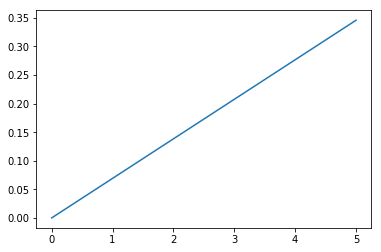

In [152]:
plt.plot(tao, e)

In [153]:
e = gamma * yr* (tao - tao1 * np.exp(-A * (1 - zk)))


In [154]:
e = xo - xk / A * np.log(1 + xk / xo * (np.exp(xo / xk * A) - 1)) * np.exp(gamma * A * yr / xk * (tao1 - tao))

In [155]:
def rendimiento(tao):
    if tao <= tao1 and tao < tao2:
        e = gamma * yr* tao * (1- np.exp(- A))
        print("tao < tao1 and tao < tao2")
        return e
    if tao > tao1 and tao <= tao2:
        zk = xk / (A * xo) * np.log((xo * np.exp(gamma * A * yr / xk * (tao - tao1)) - xk) / (xo - xk))
        e = gamma * yr * (tao - tao1 * np.exp(- A * (1 - zk)))
        print("tao >= tao1 and tao < tao2")
        return e
    if tao > tao2:
        e = xo - xk / A * np.log(1 + xk / xo * (np.exp(xo / xk * A) - 1) * np.exp(gamma * A * yr / xk * (tao1 - tao)))
        print("tao >= tao2")
        return e
    

In [156]:
tao = 9
print("tao1 = {} tao2 = {}".format(tao1, tao2))
rendimiento(tao)

tao1 = 1.2499999999999998 tao2 = 5.879695601713209
tao >= tao2


0.4653356509957497

In [157]:
ttao = [i for i in range(5)]
ttao

[0, 1, 2, 3, 4]

In [158]:
ttao = [i for i in np.linspace(0,5)]
ttao

[0.0,
 0.10204081632653061,
 0.20408163265306123,
 0.30612244897959184,
 0.40816326530612246,
 0.5102040816326531,
 0.6122448979591837,
 0.7142857142857143,
 0.8163265306122449,
 0.9183673469387755,
 1.0204081632653061,
 1.1224489795918369,
 1.2244897959183674,
 1.3265306122448979,
 1.4285714285714286,
 1.5306122448979593,
 1.6326530612244898,
 1.7346938775510203,
 1.836734693877551,
 1.9387755102040818,
 2.0408163265306123,
 2.142857142857143,
 2.2448979591836737,
 2.3469387755102042,
 2.4489795918367347,
 2.5510204081632653,
 2.6530612244897958,
 2.7551020408163267,
 2.857142857142857,
 2.9591836734693877,
 3.0612244897959187,
 3.163265306122449,
 3.2653061224489797,
 3.36734693877551,
 3.4693877551020407,
 3.5714285714285716,
 3.673469387755102,
 3.7755102040816326,
 3.8775510204081636,
 3.979591836734694,
 4.081632653061225,
 4.183673469387755,
 4.285714285714286,
 4.387755102040816,
 4.4897959183673475,
 4.591836734693878,
 4.6938775510204085,
 4.795918367346939,
 4.89795918367346

In [159]:
caso1 = [rendimiento(tao) for tao in np.linspace(0,15)]
caso1


tao < tao1 and tao < tao2
tao < tao1 and tao < tao2
tao < tao1 and tao < tao2
tao < tao1 and tao < tao2
tao < tao1 and tao < tao2
tao >= tao1 and tao < tao2
tao >= tao1 and tao < tao2
tao >= tao1 and tao < tao2
tao >= tao1 and tao < tao2
tao >= tao1 and tao < tao2
tao >= tao1 and tao < tao2
tao >= tao1 and tao < tao2
tao >= tao1 and tao < tao2
tao >= tao1 and tao < tao2
tao >= tao1 and tao < tao2
tao >= tao1 and tao < tao2
tao >= tao1 and tao < tao2
tao >= tao1 and tao < tao2
tao >= tao1 and tao < tao2
tao >= tao1 and tao < tao2
tao >= tao2
tao >= tao2
tao >= tao2
tao >= tao2
tao >= tao2
tao >= tao2
tao >= tao2
tao >= tao2
tao >= tao2
tao >= tao2
tao >= tao2
tao >= tao2
tao >= tao2
tao >= tao2
tao >= tao2
tao >= tao2
tao >= tao2
tao >= tao2
tao >= tao2
tao >= tao2
tao >= tao2
tao >= tao2
tao >= tao2
tao >= tao2
tao >= tao2
tao >= tao2
tao >= tao2
tao >= tao2
tao >= tao2
tao >= tao2


[0.0,
 0.021175462451348267,
 0.042350924902696534,
 0.0635263873540448,
 0.08470184980539307,
 0.10586240724665469,
 0.12693119197306726,
 0.14783738881474864,
 0.1685261464121838,
 0.18894922443715043,
 0.20906060982884964,
 0.22881410899010135,
 0.24816182896433522,
 0.26705309024678237,
 0.28543355559493905,
 0.30324446322126325,
 0.32042190154796807,
 0.33689608714873753,
 0.35259062034949884,
 0.36742169991480716,
 0.38130372981839566,
 0.3941960908220593,
 0.406090123152443,
 0.41699047089218877,
 0.4269147321107626,
 0.43589255261409354,
 0.44396415365496233,
 0.45117844370314303,
 0.457590892189559,
 0.46326134405019936,
 0.46825193197286874,
 0.4726252062684879,
 0.4764425591202635,
 0.479762978345391,
 0.48264213103884324,
 0.48513175212947535,
 0.48727929723524216,
 0.48912781199630445,
 0.4907159692896542,
 0.4920782292572582,
 0.49324508303711023,
 0.4942433480260757,
 0.49509648943078877,
 0.4958249491782092,
 0.49644646866322384,
 0.49697639621796236,
 0.497427973636398

In [160]:
caso1

[0.0,
 0.021175462451348267,
 0.042350924902696534,
 0.0635263873540448,
 0.08470184980539307,
 0.10586240724665469,
 0.12693119197306726,
 0.14783738881474864,
 0.1685261464121838,
 0.18894922443715043,
 0.20906060982884964,
 0.22881410899010135,
 0.24816182896433522,
 0.26705309024678237,
 0.28543355559493905,
 0.30324446322126325,
 0.32042190154796807,
 0.33689608714873753,
 0.35259062034949884,
 0.36742169991480716,
 0.38130372981839566,
 0.3941960908220593,
 0.406090123152443,
 0.41699047089218877,
 0.4269147321107626,
 0.43589255261409354,
 0.44396415365496233,
 0.45117844370314303,
 0.457590892189559,
 0.46326134405019936,
 0.46825193197286874,
 0.4726252062684879,
 0.4764425591202635,
 0.479762978345391,
 0.48264213103884324,
 0.48513175212947535,
 0.48727929723524216,
 0.48912781199630445,
 0.4907159692896542,
 0.4920782292572582,
 0.49324508303711023,
 0.4942433480260757,
 0.49509648943078877,
 0.4958249491782092,
 0.49644646866322384,
 0.49697639621796236,
 0.497427973636398

Text(0,0.5,'Rendimiento e')

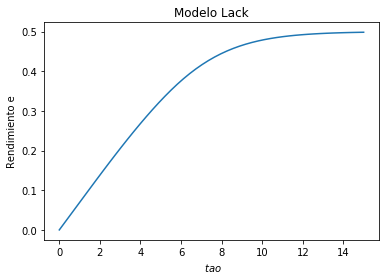

In [161]:
Tao = np.linspace(0,15)

plt.plot(Tao, caso1)
plt.title("Modelo Lack")
plt.xlabel(" $tao $ ")
plt.ylabel("Rendimiento e")
#plt.legend(('$xk=0.3$'),loc=0)

# Autre

In [228]:
def rendimiento(tao):
    if tao <= tao1 and tao < tao2:
        e = gamma * yr* tao * (1- np.exp(- A))
        print("tao < tao1 and tao < tao2")
        return e
    if tao > tao1 and tao <= tao2:
        zk = xk / (A * xo) * np.log((xo * np.exp(gamma * A * yr / xk * (tao - tao1)) - xk) / (xo - xk))
        e = gamma * yr * (tao - tao1 * np.exp(- A * (1 - zk)))
        print("tao >= tao1 and tao < tao2")
        return e
    if tao > tao2:
        e = xo - xk / A * np.log(1 + xk / xo * (np.exp(xo / xk * A) - 1) * np.exp(gamma * A * yr / xk * (tao1 - tao)))
        print("tao >= tao2")
        return e
    

In [232]:
def rendementparametre(xk,A):
    Tao = np.linspace(0,15)

    plt.plot(Tao, caso1)
    plt.title("Modelo Lack")
    plt.xlabel(" $tao $ ")
    plt.ylabel("Rendimiento e")
    return


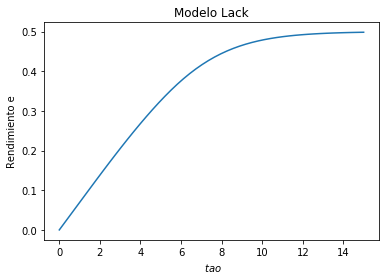

In [233]:
rendementparametre(0.1,1)

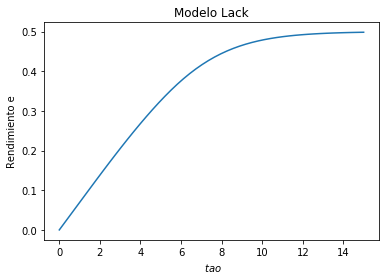

In [234]:
rendementparametre(0.2,2)

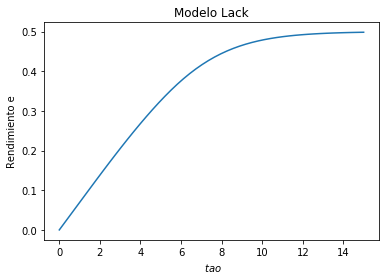

In [235]:
rendementparametre(0.4,4)

4.583946341135364

numpy.ndarray

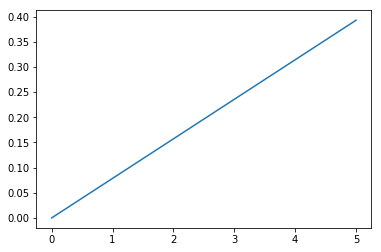

tao1 = 1.2499999999999998 tao2 = 5.879695601713209
tao >= tao2


0.48928938945393036

[0, 1, 2, 3, 4]

[0.0,
 0.10204081632653061,
 0.20408163265306123,
 0.30612244897959184,
 0.40816326530612246,
 0.5102040816326531,
 0.6122448979591837,
 0.7142857142857143,
 0.8163265306122449,
 0.9183673469387755,
 1.0204081632653061,
 1.1224489795918369,
 1.2244897959183674,
 1.3265306122448979,
 1.4285714285714286,
 1.5306122448979593,
 1.6326530612244898,
 1.7346938775510203,
 1.836734693877551,
 1.9387755102040818,
 2.0408163265306123,
 2.142857142857143,
 2.2448979591836737,
 2.3469387755102042,
 2.4489795918367347,
 2.5510204081632653,
 2.6530612244897958,
 2.7551020408163267,
 2.857142857142857,
 2.9591836734693877,
 3.0612244897959187,
 3.163265306122449,
 3.2653061224489797,
 3.36734693877551,
 3.4693877551020407,
 3.5714285714285716,
 3.673469387755102,
 3.7755102040816326,
 3.8775510204081636,
 3.979591836734694,
 4.081632653061225,
 4.183673469387755,
 4.285714285714286,
 4.387755102040816,
 4.4897959183673475,
 4.591836734693878,
 4.6938775510204085,
 4.795918367346939,
 4.89795918367346

tao < tao1 and tao < tao2
tao < tao1 and tao < tao2
tao >= tao1 and tao < tao2
tao >= tao1 and tao < tao2
tao >= tao1 and tao < tao2
tao >= tao1 and tao < tao2
tao >= tao1 and tao < tao2
tao >= tao1 and tao < tao2
tao >= tao1 and tao < tao2
tao >= tao1 and tao < tao2
tao >= tao1 and tao < tao2
tao >= tao1 and tao < tao2
tao >= tao1 and tao < tao2
tao >= tao1 and tao < tao2
tao >= tao1 and tao < tao2
tao >= tao2
tao >= tao2
tao >= tao2
tao >= tao2
tao >= tao2
tao >= tao2
tao >= tao2
tao >= tao2
tao >= tao2
tao >= tao2
tao >= tao2
tao >= tao2
tao >= tao2
tao >= tao2
tao >= tao2
tao >= tao2
tao >= tao2
tao >= tao2
tao >= tao2
tao >= tao2
tao >= tao2
tao >= tao2
tao >= tao2
tao >= tao2
tao >= tao2
tao >= tao2
tao >= tao2
tao >= tao2
tao >= tao2
tao >= tao2
tao >= tao2
tao >= tao2
tao >= tao2
tao >= tao2
tao >= tao2


[0.0,
 0.024041249659867737,
 0.7190914533309968,
 0.718579163809553,
 0.7179856386328294,
 0.7172858071202229,
 0.7164525039367247,
 0.7154541878287507,
 0.7142532926478884,
 0.7128045965993925,
 0.7110533931746522,
 0.7089333394989181,
 0.7063638773622033,
 0.7032471177307396,
 0.6994640639179353,
 0.3422169643639321,
 0.36113676813322215,
 0.378934489364718,
 0.39547915297515,
 0.41065899741032463,
 0.4243921053446273,
 0.4366350926454827,
 0.4473880158319006,
 0.4566943655439216,
 0.4646361475721564,
 0.4713251864255304,
 0.4768924922334224,
 0.48147761541705325,
 0.4852194768336529,
 0.48824948300646315,
 0.4906870935567196,
 0.49263756209496956,
 0.49419135465912917,
 0.49542471233898844,
 0.49640089297803586,
 0.4971717372028536,
 0.49777931571338624,
 0.49825750797968005,
 0.49863343155527706,
 0.49892868792607403,
 0.4991604198386353,
 0.4993421914103874,
 0.4994847102707726,
 0.4995964137138029,
 0.49968394057592386,
 0.49975250873476684,
 0.49980621564599303,
 0.499848276714

[0.0,
 0.024041249659867737,
 0.7190914533309968,
 0.718579163809553,
 0.7179856386328294,
 0.7172858071202229,
 0.7164525039367247,
 0.7154541878287507,
 0.7142532926478884,
 0.7128045965993925,
 0.7110533931746522,
 0.7089333394989181,
 0.7063638773622033,
 0.7032471177307396,
 0.6994640639179353,
 0.3422169643639321,
 0.36113676813322215,
 0.378934489364718,
 0.39547915297515,
 0.41065899741032463,
 0.4243921053446273,
 0.4366350926454827,
 0.4473880158319006,
 0.4566943655439216,
 0.4646361475721564,
 0.4713251864255304,
 0.4768924922334224,
 0.48147761541705325,
 0.4852194768336529,
 0.48824948300646315,
 0.4906870935567196,
 0.49263756209496956,
 0.49419135465912917,
 0.49542471233898844,
 0.49640089297803586,
 0.4971717372028536,
 0.49777931571338624,
 0.49825750797968005,
 0.49863343155527706,
 0.49892868792607403,
 0.4991604198386353,
 0.4993421914103874,
 0.4994847102707726,
 0.4995964137138029,
 0.49968394057592386,
 0.49975250873476684,
 0.49980621564599303,
 0.499848276714

Text(0,0.5,'Rendimiento e')

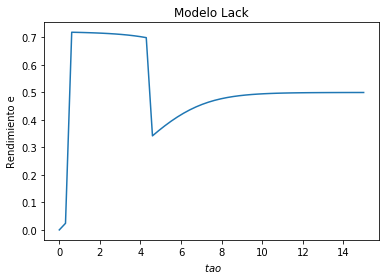